,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


【データ数を確認】
(18572, 8)
【学習データのスケール変換後】


,所得,築年数,地域人口,緯度,部屋数/人
0,0.034653,0.178247,-0.075532,-0.723337,-0.837592
1,-0.368102,-0.170455,-0.767887,-1.203976,1.614325
2,0.602835,1.573057,-0.256822,-0.788667,-0.405778
3,1.406941,-0.780684,1.212489,-0.588012,0.112610
4,-0.688367,1.311530,-0.178263,1.119887,-0.694816


,所得,築年数,地域人口,緯度,部屋数/人
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.533263e-15,7.651999e-17,8.280556e-17,-3.489093e-14,1.134163e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-1.850904e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-4.232155e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,-2.454245e-02
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,2.989548e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,3.790064e+01


【テストデータのスケール変換後】


,所得,築年数,地域人口,緯度,部屋数/人
0,-0.467563,0.788477,0.786026,-0.681340,-0.509344
1,-0.936412,0.875652,-1.213342,0.961229,-0.036639
2,0.562961,-1.565265,0.653943,-1.124647,0.100350
3,1.164446,0.701301,-0.367323,-0.639342,-0.372270
4,-0.931181,1.660233,-1.188306,1.133886,-0.177363


,所得,築年数,地域人口,緯度,部屋数/人
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.005149,0.008292,-0.020433,0.004869,0.030341
std,1.005489,0.988514,1.012970,1.007327,1.245476
min,-2.038837,-2.175494,-1.272908,-1.423296,-1.752933
25%,-0.748863,-0.780684,-0.583144,-0.784000,-0.407443
50%,-0.154763,0.003896,-0.253369,-0.630010,-0.011944
75%,0.592882,0.788477,0.258559,0.965896,0.303824
max,7.211958,2.096111,23.385096,2.967777,51.258832


【学習データの決定係数】
0.4740232339239423
【テストデータの決定係数】
0.4835885444947774
【予測値】
[3.68520926 3.9076587  3.36531902]
【各要素の重み】
[ 0.63613076  0.15847579  0.03447017 -0.11502971  0.07119682]
【切片】
1.8977734592307616


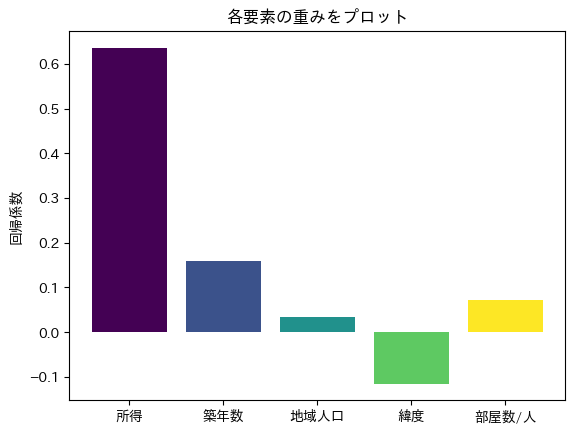

In [ ]:
# 機械学習でデータ分析しよう
# 11章 回帰の手法を学ぼう #2
# 5) 回帰手法の改善（多重共線性の対処）
# (2) 多重共線性の対処後の重回帰を実施

# 日本語設定をインストール（セッション切れたら再実行が必要）
!pip install japanize-matplotlib
import japanize_matplotlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

# 前処理を実施したCSVファイルをGoogle Colaboratoryにアップロードし、pandasのread_csv関数で読み込む
df = pd.read_csv('/content/california_housing_cleansing.csv')
display(df.head())

# 取り込んだデータ「Unnamed: 0」という列を削除
# 前処理のときにインデックス列として表示されていたもので、取込むデータの列名がブランクの場合、
# その列は自動的に「Unnamed: 数字」という列名が割り振られる
df = df.drop(columns = ['Unnamed: 0'])
display(df.head())
print("【データ数を確認】")
print(df.shape)

# 説明変数Xと目的変数yを最定義
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()

# (1) 説明変数のスケール変換
# Xとyをそれぞれ学習データとテストデータに分割する
# train_test_split関数をインポート
from sklearn.model_selection import train_test_split

# 上記の関数を使用し、比率7:3で学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# StandardScalerクラスのインポート
from sklearn.preprocessing import StandardScaler

# 上記のクラスをインスタンス化し、scalerという変数に代入する
scaler = StandardScaler()

# 標準化の変換モデルの生成
scaler.fit(X_train)

# 標準化の変換モデルを利用したスケールの変換
X_train_scaled = scaler.transform(X_train)
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '部屋数/人'])
print("【学習データのスケール変換後】")
display(df_X_train_scaled.head())
display(df_X_train_scaled.describe())

X_test_scaled = scaler.transform(X_test)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '部屋数/人'])
print("【テストデータのスケール変換後】")
display(df_X_test_scaled.head())
display(df_X_test_scaled.describe())

# (2) 予測モデルの学習
# linear_modelモジュールのLinearRegressクラスをインポート
from sklearn.linear_model import LinearRegression

# 上記のクラスをインスタンス化し、modelという変数に代入する
model = LinearRegression()

# 学習データで学習を実行する
model.fit(X_train_scaled, y_train)

# (3) 予測モデルの評価
#print(f"学習データの決定係数：{model.score(X_train_scaled, y_train)}")
#print(f"テストデータの決定係数：{model.score(X_test_scaled, y_test)}")
print("【学習データの決定係数】")
print(model.score(X_train_scaled, y_train))
print("【テストデータの決定係数】")
print(model.score(X_test_scaled, y_test))

# (4) 予測
# テストデータを取り込む
X_new = np.array([[8, 41, 500, 38, 2],
                 [10, 10, 1000, 40, 1],
                 [7.5, 25, 3500, 39, 3]])

# 生成した標準化の変換モデルを利用して、説明変数のテストデータX_newを変換する
X_new_scaled = scaler.transform(X_new)

# 予測モデルを利用し、X_newから予測値を算出
print("【予測値】")
print(model .predict(X_new_scaled))

# (4) 設定したゴールに対する考察
# 住宅価格を予測する計算式を決定する
print("【各要素の重み】")
print(model.coef_)
print("【切片】")
print(model.intercept_)

# 各要素が住宅価格に与える影響度合い
# 各要素の重みとして得られたmodel.coef_の値をグラフで可視化する

# 変数名リストとモデル係数
variables = ['所得', '築年数', '地域人口', '緯度', '部屋数/人']
coefficients = model.coef_

# seabornでのグラフ化
#sns.barplot(x=variables, y=coefficients, hue=variables, palette='viridis', legend=False)

# Matpotlibでのグラフ化
# カラーマップから色を取得
cmap = plt.get_cmap('viridis')                      # viridisカラーマップを使用
colors = cmap(np.linspace(0, 1, len(variables)))    # 0から1の範囲で、変数の数だけ色を均等に生成
plt.bar(variables, coefficients, color=colors)      # 各バーに色を指定

plt.title('各要素の重みをプロット')
plt.ylabel('回帰係数')
plt.show()